<a href="https://colab.research.google.com/github/flaviarbatista/Assignments/blob/main/Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 5: Exploratory Data Analysis with Pandas**
### **Name:** Flavia Batista
### **Course:** Data Analytics and Business Intelligence Analyst
### **Institution:** Willis College

**Assignment - EDA using Pandas**

***Instructions***
- Clone a copy of the assignment notebook in Google Colab.
- **Complete the tasks by filling in the code where indicated by TODO comments. Put each task in a new cell.**
- Run each cell to ensure your code works correctly.
- Pay attention to the output of each cell and interpret the results.
- For visualisation tasks, make sure to label axes, add titles, and choose appropriate colour schemes.
- After completing all tasks, review your findings and include notes of your insights gained from the EDA process as markdown notes for assessments.


 ## GitHub Setup

In [1]:
!apt-get install -y git
!git config --global user.email "flavia.bi.progress@gmail.com"
!git config --global user.name "flaviarbatista"

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.15).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


In [2]:
import getpass, os
token = getpass.getpass('Token')
os.environ['GHTOKEN'] = token

Token··········


## Mount Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Clone the repository

In [4]:
!git clone https://github.com/flaviarbatista/Assignments.git

Cloning into 'Assignments'...
remote: Enumerating objects: 103, done.
remote: Counting objects: 100% (103/103), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 103 (delta 61), reused 89 (delta 55), pack-reused 0 (from 0)
Receiving objects: 100% (103/103), 1.87 MiB | 7.89 MiB/s, done.
Resolving deltas: 100% (61/61), done.


# Titanic Dataset Exploratory Data Analysis

## Import necessary libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Task 1: Load the Titanic dataset

### **TODO: Load the Titanic dataset from the following URL**
url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"

In [6]:
url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv\n"
df_url = pd.read_csv(url)
print(f"Dataset loaded from URL: {url}")

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Titanic-Dataset.csv')
print("Titanic-Dataset.csv loaded successfully from Google Drive.")

Dataset loaded from URL: https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv

Titanic-Dataset.csv loaded successfully from Google Drive.


I loaded the public `URL` into `df_url` and file provided on Moodle, `Titanic-Dataset.csv`, into `df`. I used `df` for the assignment because the URL version was missing several columns and fields required to complete the tasks. The file `Titanic-Dataset.csv` contains the full set of variables needed to reproduce the expected results.

## Task 2: Inspect the data

### **TODO: Display the first 5 rows of the dataset**

In [7]:
print("First 5 rows of the dataset Titanic-Dataset.csv:")
df.head()

First 5 rows of the dataset Titanic-Dataset.csv:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
print("First 5 rows of the Titanic dataset from URL:")
df_url.head()

First 5 rows of the Titanic dataset from URL:


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [9]:
print("\nLast 5 rows of the dataset:")
df.tail()


Last 5 rows of the dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### **TODO: Display the data types of each column**

In [10]:
print("\nData types of each column:")
df.dtypes


Data types of each column:


,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


### **TODO: Display summary statistics of the numerical columns**

In [11]:
print("\nSummary statistics of numerical columns:")
df.describe()


Summary statistics of numerical columns:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Task 3: Clean and preprocess the data

### **TODO: Create a new categorical feature `PclassCategory` from `Pclass`**

In [12]:
df['PclassCategory'] = df['Pclass'].map({1: 'First', 2: 'Second', 3: 'Third'})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PclassCategory
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Third
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,First
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Third
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,First
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Third


### **TODO: Create a new categorical feature `CabinCategory` from `Cabin`**

In [13]:
df['CabinCategory'] = df['Cabin'].str[0].fillna('Unknown').astype('category')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PclassCategory,CabinCategory
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Third,Unknown
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,First,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Third,Unknown
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,First,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Third,Unknown


In [14]:
df['CabinCategory'].value_counts()

,count
CabinCategory,
Unknown,687
C,59
B,47
D,33
E,32
A,15
F,13
G,4
T,1


### **TODO: Handle missing values in the `Age` column (use mean age)**

In [15]:
print("Missing ages before fill:", df['Age'].isna().sum())
mean_age = df['Age'].mean()
df['Age'].fillna(mean_age).head()

Missing ages before fill: 177


,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0


In [16]:
print("Missing ages after fill:", df['Age'].isna().sum())

Missing ages after fill: 177


### **TODO: Create a `Family` feature by combining `SibSp` and `Parch`**

In [17]:
df['Family'] = df['SibSp'] + df['Parch']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PclassCategory,CabinCategory,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Third,Unknown,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,First,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Third,Unknown,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,First,C,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Third,Unknown,0


In [18]:
df[['Name','SibSp','Parch','Family']].head()

,Name,SibSp,Parch,Family
0,"Braund, Mr. Owen Harris",1,0,1
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,1
2,"Heikkinen, Miss. Laina",0,0,0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,1
4,"Allen, Mr. William Henry",0,0,0


## Task 4: Identify specific data points

### **TODO: Find passengers with the highest fare**

In [19]:
highest_fare_passengers = df[df['Fare'] == df['Fare'].max()]
highest_fare_passengers[['Name', 'Fare']]

,Name,Fare
258,"Ward, Miss. Anna",512.3292
679,"Cardeza, Mr. Thomas Drake Martinez",512.3292
737,"Lesurer, Mr. Gustave J",512.3292


### **TODO: Find passengers with the largest family size**

In [20]:
largest_family_passengers = df[df['Family'] == df['Family'].max()]
largest_family_passengers[['Name','Family']]

,Name,Family
159,"Sage, Master. Thomas Henry",10
180,"Sage, Miss. Constance Gladys",10
201,"Sage, Mr. Frederick",10
324,"Sage, Mr. George John Jr",10
792,"Sage, Miss. Stella Anna",10
846,"Sage, Mr. Douglas Bullen",10
863,"Sage, Miss. Dorothy Edith ""Dolly""",10


# Task 5: Demonstrate Pandas Series and DataFrame functionalities

### **TODO: Create a Pandas Series of passenger names**

In [21]:
names_series = df['Name']
names_series.head()

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"


### **TODO: Create a DataFrame of passenger names and ages**

In [22]:
names_ages_df = df[['Name', 'Age']]
names_ages_df.head()

,Name,Age
0,"Braund, Mr. Owen Harris",22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
2,"Heikkinen, Miss. Laina",26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
4,"Allen, Mr. William Henry",35.0


### **TODO: Slice the DataFrame to show only passengers older than 50**

In [23]:
older_passengers = names_ages_df[names_ages_df['Age'] > 50]
older_passengers

,Name,Age
6,"McCarthy, Mr. Timothy J",54.0
11,"Bonnell, Miss. Elizabeth",58.0
15,"Hewlett, Mrs. (Mary D Kingcome)",55.0
33,"Wheadon, Mr. Edward H",66.0
54,"Ostby, Mr. Engelhart Cornelius",65.0
...,...,...
820,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",52.0
829,"Stone, Mrs. George Nelson (Martha Evelyn)",62.0
851,"Svensson, Mr. Johan",74.0
857,"Daly, Mr. Peter Denis",51.0


# Task 6: Introduce multi-indexing

### **TODO: Create a multi-index DataFrame grouped by `Sex` and `Pclass`**

In [24]:
# multi_index_df =
multi_index_df = df.groupby(['Sex', 'Pclass']).size().rename('Count')
multi_index_df

Sex     Pclass
female  1          94
        2          76
        3         144
male    1         122
        2         108
        3         347
Name: Count, dtype: int64

# Task 7: Visualizations

### **TODO: Create a histogram of passenger ages**

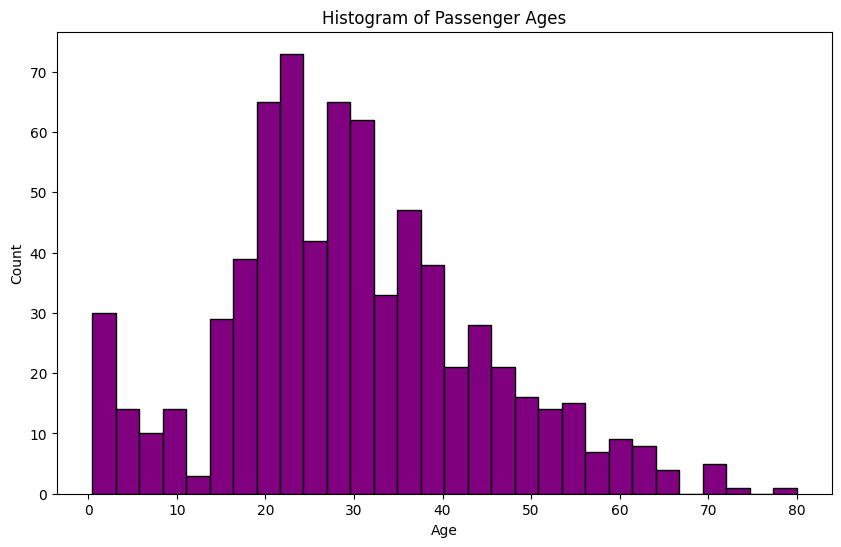

In [25]:
plt.figure(figsize=(10, 6))
plt.hist(df['Age'].dropna(), bins=30, color='purple', edgecolor='black')
plt.title('Histogram of Passenger Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### **TODO: Create a bar plot of survival rates by passenger class**

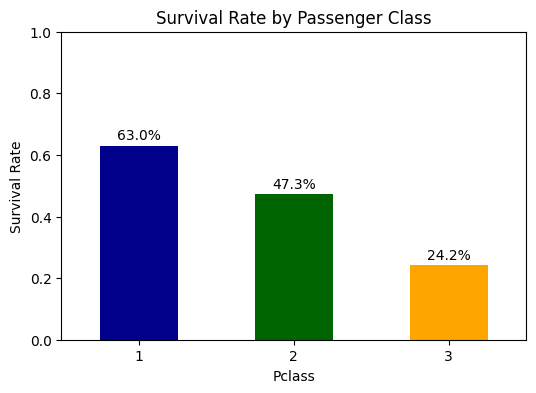

In [26]:
survival_by_class = df.groupby('Pclass')['Survived'].mean()
survival_by_class.plot(kind='bar', figsize=(6,4), color=['darkblue','darkgreen','orange'])
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Pclass')
plt.xticks(rotation=0)
plt.ylabel('Survival Rate')
plt.ylim(0,1)
for i, v in enumerate(survival_by_class.values):
    plt.text(i, v + 0.02, f'{v:.1%}', ha='center')
plt.show()

### **TODO: Create a heatmap of correlation between numerical features**

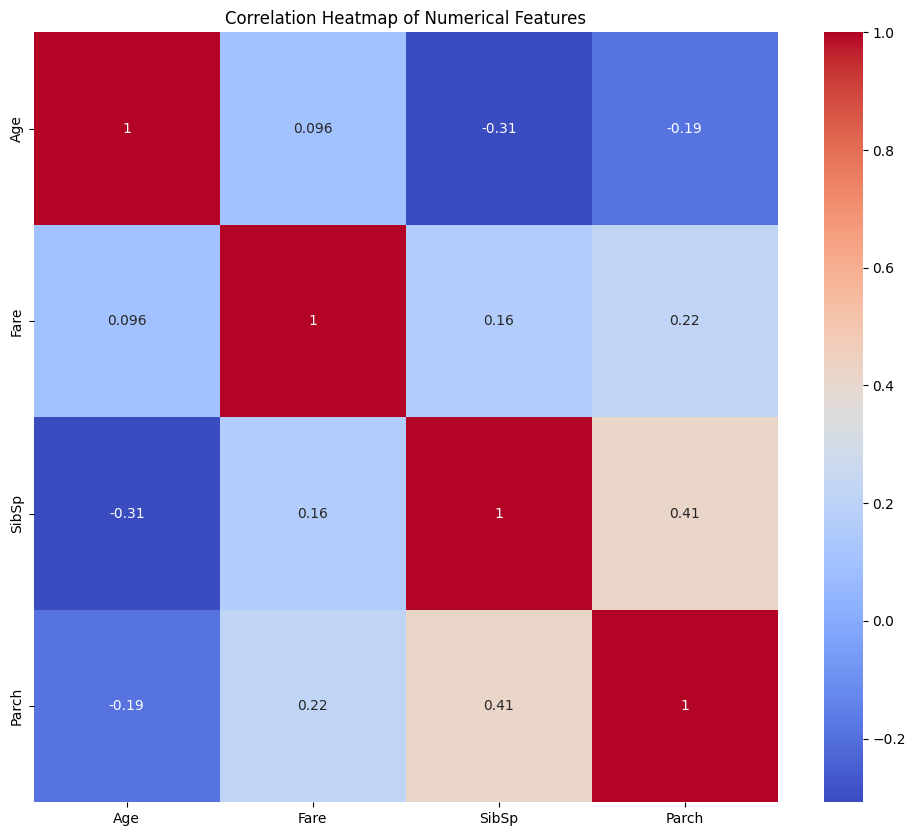

In [27]:
plt.figure(figsize=(12, 10))
corr = df[['Age','Fare','SibSp','Parch']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

### **TODO: Create a pair plot of `Age`, `Fare`, `SibSp`, and `Parch`, colored by `Survived`**

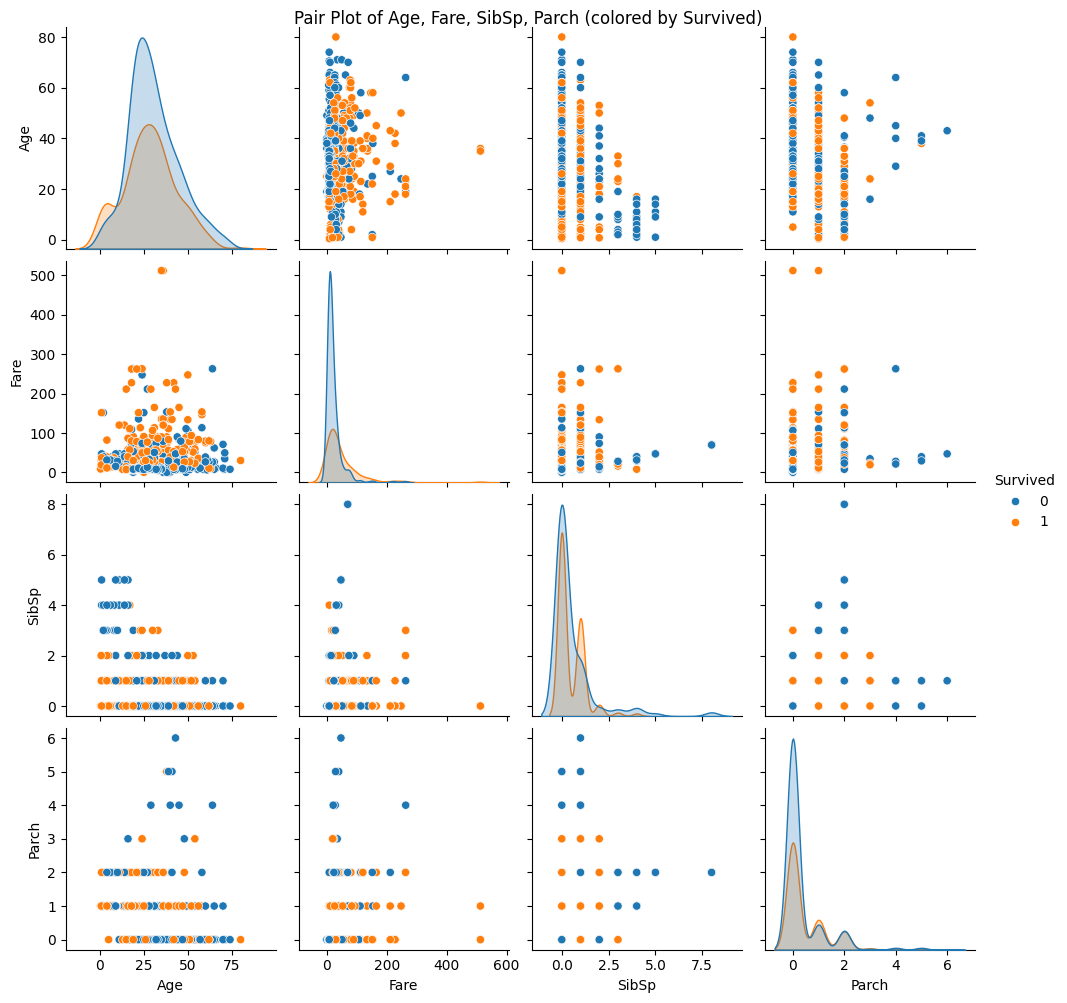

In [28]:
sns.pairplot(df, vars=['Age','Fare','SibSp','Parch'], hue='Survived')
plt.suptitle('Pair Plot of Age, Fare, SibSp, Parch (colored by Survived)', y=1)
plt.show()

# Task 8: Analyze survival rates

### **TODO: Calculate and display survival rates by sex**

In [29]:
survival_by_sex = df.groupby('Sex')['Survived'].mean()
(survival_by_sex * 100).round(2).apply(lambda x: f"{x:.2f}%")

,Survived
Sex,
female,74.20%
male,18.89%


### **TODO: Calculate and display survival rates by passenger class**

In [30]:
# survival_by_class =
survival_by_class = df.groupby('Pclass')['Survived'].mean()
(survival_by_class * 100).round(2).apply(lambda x: f"{x:.2f}%")

,Survived
Pclass,
1,62.96%
2,47.28%
3,24.24%


# Task 9: Analyze age distribution

### **TODO: Create a box plot of age distribution by passenger class and sex**

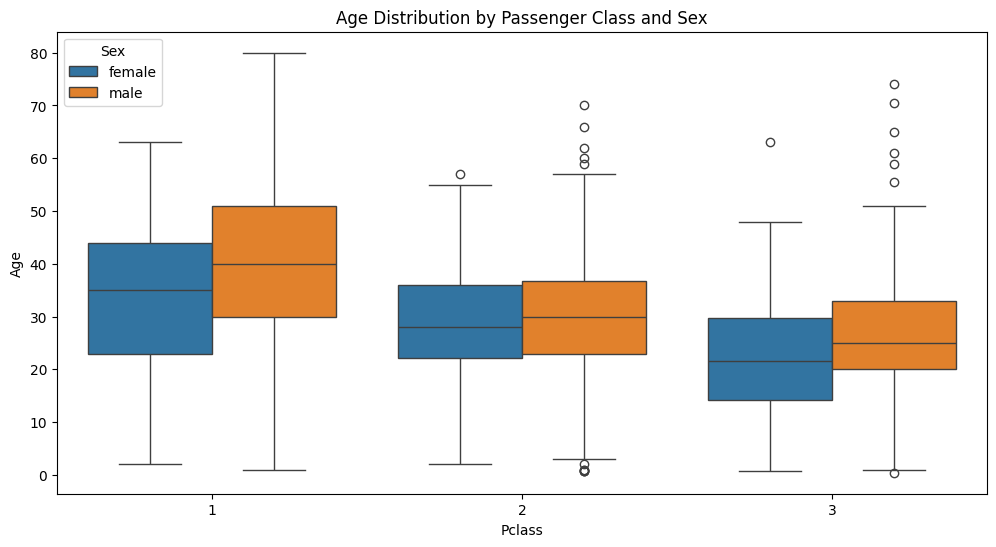

In [31]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Pclass', y='Age', hue='Sex', data=df)
plt.title('Age Distribution by Passenger Class and Sex')
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.show()

# Task 10: Analyze fare distribution

### **TODO: Create a violin plot of fare distribution by passenger class and survival status**

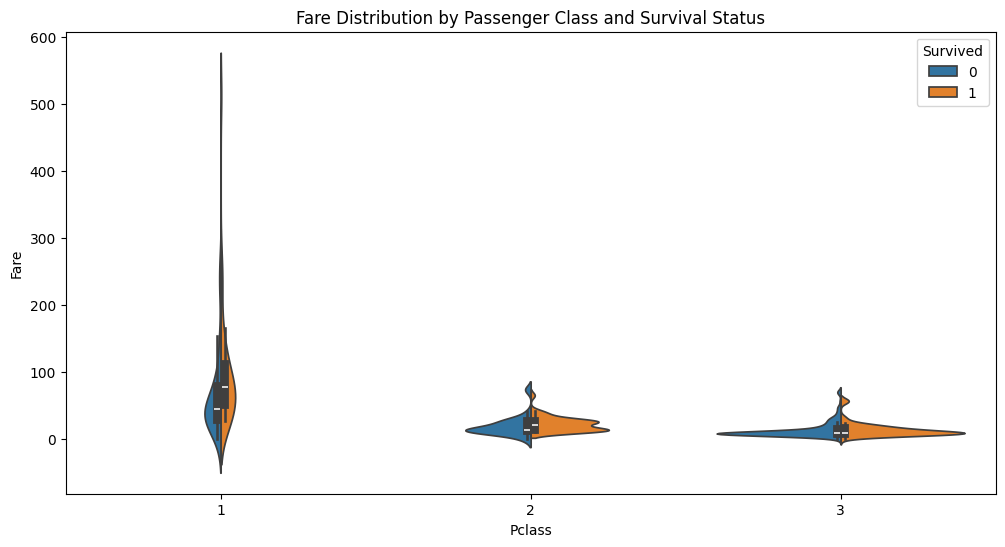

In [32]:
plt.figure(figsize=(12,6))
sns.violinplot(x='Pclass', y='Fare', hue='Survived', data=df, split=True)
plt.title('Fare Distribution by Passenger Class and Survival Status')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.show()

In [33]:
print("EDA tasks completed.")

EDA tasks completed.


## Commit and Push Changes

In [34]:
%cd /content/Assignments

/content/Assignments


In [35]:
!git add --all

In [36]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


In [37]:
!git commit -m "Complete Assignment_5"

On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


In [38]:
!git checkout

Your branch is up to date with 'origin/main'.


In [39]:
!git push https://$GHTOKEN@github.com/flaviarbatista/Assignments.git main

Everything up-to-date


In [40]:
os.environ.pop('GHTOKEN', None)
print("GHTOKEN removed from the session.")

GHTOKEN removed from the session.


## EDA Insights

- Dataset contains: PassengerId	Survived	Pclass	Name	Sex	Age	SibSp	Parch	Ticket	Fare	Cabin	Embarked.
- Missing values: `Age` and `Cabin` have many missing entries; handled by median imputation for `Age` and a categorical `CabinCategory` with "Unknown" when missing.
- Feature engineering:
  - `CabinCategory`: eextract the first letter from Cabin (deck). Missing cabins → "Unknown". Captures location on the ship which may relate to survival.
  - `Family` = `SibSp` + `Parch`. Represents family size on board; useful because family size likely affects survival behavior and priority.
  - `PclassCategory`: map `Pclass` to First / Second / Third to capture socio-economic tiers.
- Key findings:
  - Survival rate is higher for females than males — consistent with “women and children first” boarding policies.
  - Higher passenger class (Pclass == 1) has the highest survival (63.0%), then class 2 (47.3%), then class 3 (24.2%) — wealth/position likely influenced rescue priority.
  - Passengers paying higher fares tended to have higher survival percentages,consistent with class effects.
- Visualizations included: Age Histogram, Survival rate by class, Correlation Heatmap, Pairplot for Age/Fare/SibSp/Parch colored by Survived,  Box plot ofAge Distribution by Passenger Class and Sex